In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load & Read Data

In [3]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\ML Datasets\driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
df.shape

(4000, 3)

In [5]:
df.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [6]:
df.dtypes

id                        int64
mean_dist_day           float64
mean_over_speed_perc      int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [8]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


### Check Null Value

In [9]:
df.isna().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

### Create & Train model

In [10]:
train=df.drop('id',axis=1)

In [11]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2)
kmeans.fit(train)

KMeans(n_clusters=2)

In [12]:
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [13]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1]), array([3200,  800], dtype=int64))

### Visualize the clusters

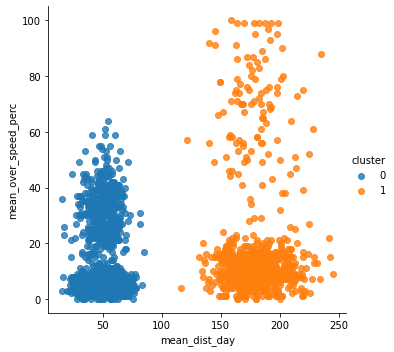

In [20]:
train['cluster']=kmeans.labels_
sns.lmplot('mean_dist_day','mean_over_speed_perc',
          data=train,hue='cluster', fit_reg=False)

Clearly see the 2 clusters.

Lets Iterate multiple times to get optimul result.

In [30]:
kmeans_4=KMeans(n_clusters=4)
kmeans_4.fit(df.drop('id',axis=1))

print(kmeans_4.cluster_centers_)
unique,counts=np.unique(kmeans_4.labels_,return_counts=True)

kmeans_4.cluster_centers_
print(dict(zip(unique,counts)))

[[ 49.99263253   5.20447169]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]
 [ 50.40482436  32.36533958]]
{0: 2773, 1: 696, 2: 104, 3: 427}


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


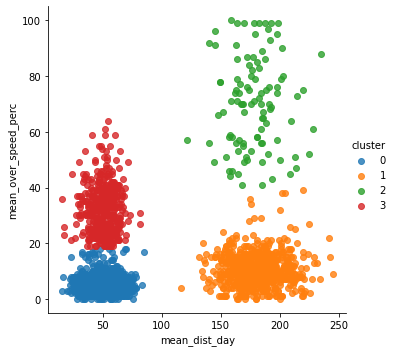

In [31]:
train['cluster']=kmeans_4.labels_
sns.lmplot('mean_dist_day','mean_over_speed_perc',
          data=train,hue='cluster', fit_reg=False)